In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier


### Reading dataset

In [41]:
sonar = pd.read_csv('/home/hasan/DATA SET/sonar/sonar.csv')

### Summarize the dataset

In [42]:
sonar.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.05,0.05,0.08,0.07,0.12,0.26,0.22,0.35,0.33,0.29,...,8.40e-03,8.90e-03,4.80e-03,9.40e-03,1.91e-02,1.40e-02,4.90e-03,5.20e-03,4.40e-03,R
1,0.03,0.06,0.11,0.11,0.10,0.23,0.24,0.38,0.56,0.62,...,2.32e-02,1.66e-02,9.50e-03,1.80e-02,2.44e-02,3.16e-02,1.64e-02,9.50e-03,7.80e-03,R
2,0.01,0.02,0.06,0.02,0.02,0.04,0.11,0.13,0.06,0.13,...,1.21e-02,3.60e-03,1.50e-02,8.50e-03,7.30e-03,5.00e-03,4.40e-03,4.00e-03,1.17e-02,R
3,0.08,0.07,0.05,0.04,0.06,0.06,0.12,0.25,0.36,0.45,...,3.10e-03,5.40e-03,1.05e-02,1.10e-02,1.50e-03,7.20e-03,4.80e-03,1.07e-02,9.40e-03,R
4,0.03,0.05,0.03,0.02,0.04,0.10,0.12,0.18,0.21,0.30,...,4.50e-03,1.40e-03,3.80e-03,1.30e-03,8.90e-03,5.70e-03,2.70e-03,5.10e-03,6.20e-03,R


In [43]:
#changing column name
a = np.arange(61)
a = list(a)
a = [str(c) for c in a]
print(a)
sonar.columns = (a) 

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60']


In [44]:
sonar.shape

(207, 61)

In [45]:
sonar.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [46]:
# correlation
pd.set_option('precision', 2)
print(sonar.corr(method='pearson'))


       0         1     2         3         4     5         6     7         8  \
0   1.00  7.36e-01  0.57  4.91e-01  3.46e-01  0.24  2.62e-01  0.36  3.57e-01   
1   0.74  1.00e+00  0.78  6.07e-01  4.20e-01  0.33  2.79e-01  0.33  3.18e-01   
2   0.57  7.80e-01  1.00  7.83e-01  5.46e-01  0.35  1.91e-01  0.24  2.54e-01   
3   0.49  6.07e-01  0.78  1.00e+00  7.29e-01  0.35  2.49e-01  0.25  2.52e-01   
4   0.35  4.20e-01  0.55  7.29e-01  1.00e+00  0.60  3.35e-01  0.20  1.77e-01   
5   0.24  3.32e-01  0.35  3.53e-01  5.97e-01  1.00  7.04e-01  0.47  3.29e-01   
6   0.26  2.79e-01  0.19  2.49e-01  3.35e-01  0.70  1.00e+00  0.68  4.69e-01   
7   0.36  3.35e-01  0.24  2.48e-01  2.04e-01  0.47  6.76e-01  1.00  7.80e-01   
8   0.36  3.18e-01  0.25  2.52e-01  1.77e-01  0.33  4.69e-01  0.78  1.00e+00   
9   0.32  2.71e-01  0.22  2.38e-01  1.83e-01  0.29  4.26e-01  0.65  8.80e-01   
10  0.34  2.97e-01  0.27  2.70e-01  2.33e-01  0.33  3.99e-01  0.59  7.34e-01   
11  0.21  1.94e-01  0.21  1.74e-01  2.13

In [47]:
# class distribution
print(sonar.groupby('60').size())

60
M    111
R     96
dtype: int64


### Data Visualizations

##### Univariate plots

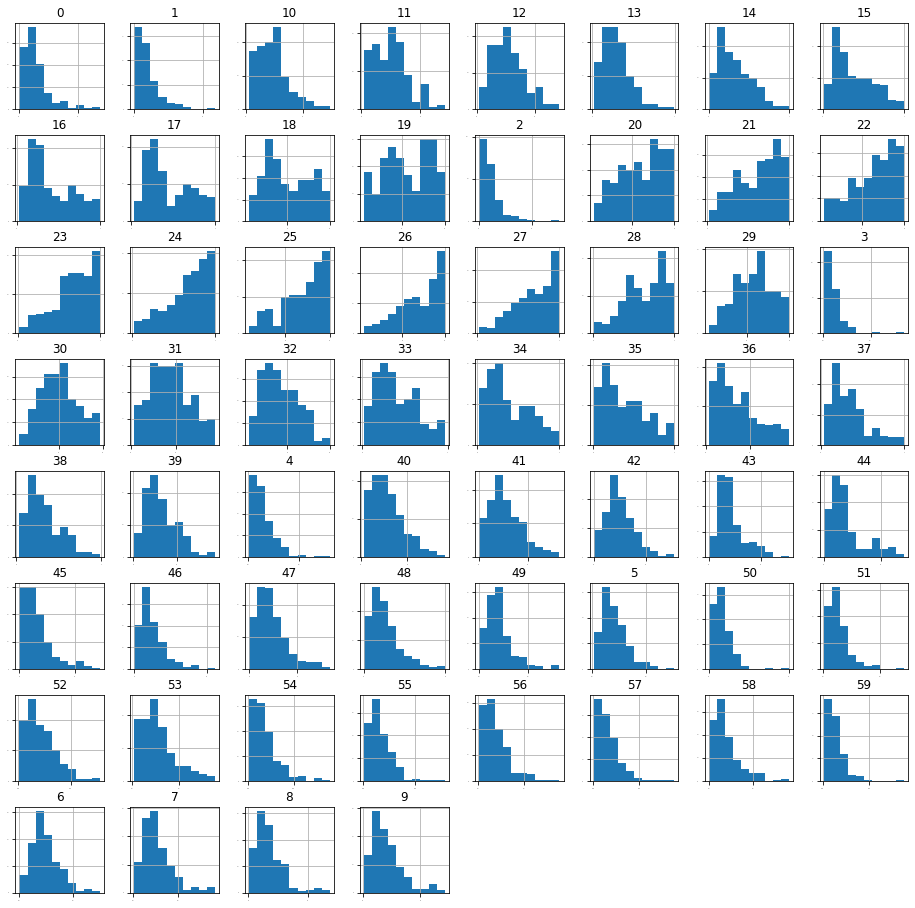

In [49]:
# histograms
sonar.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(16,16))
plt.show()

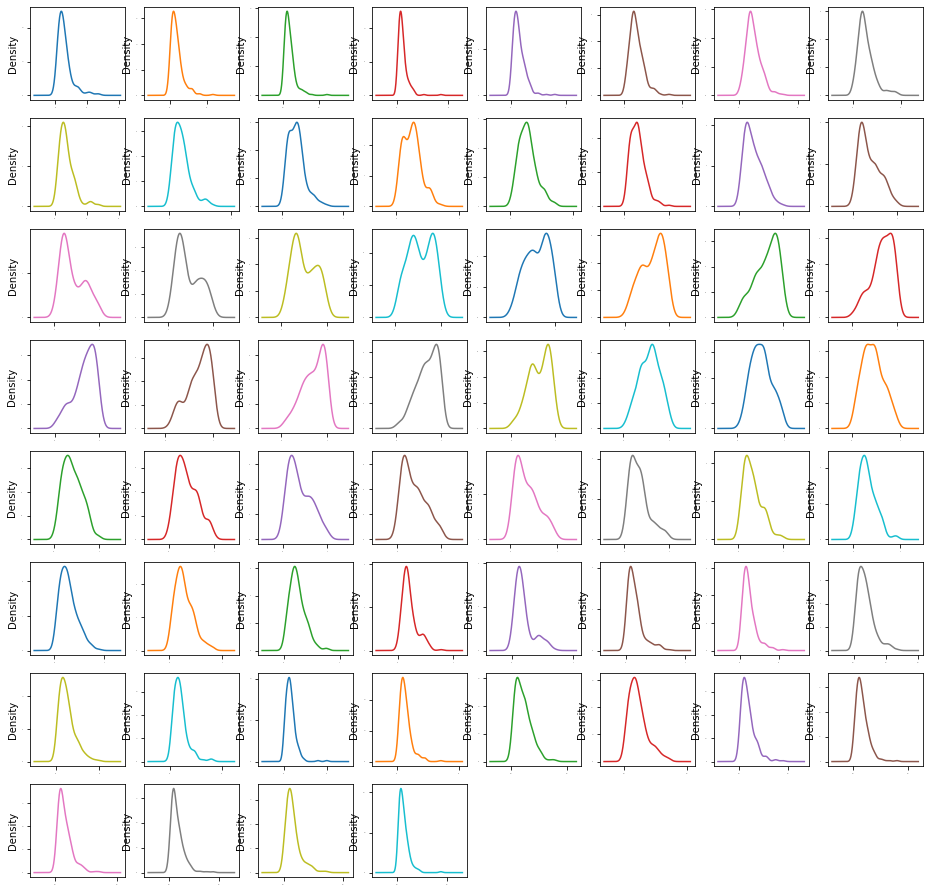

In [51]:
# density
sonar.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(16,16))
plt.show()

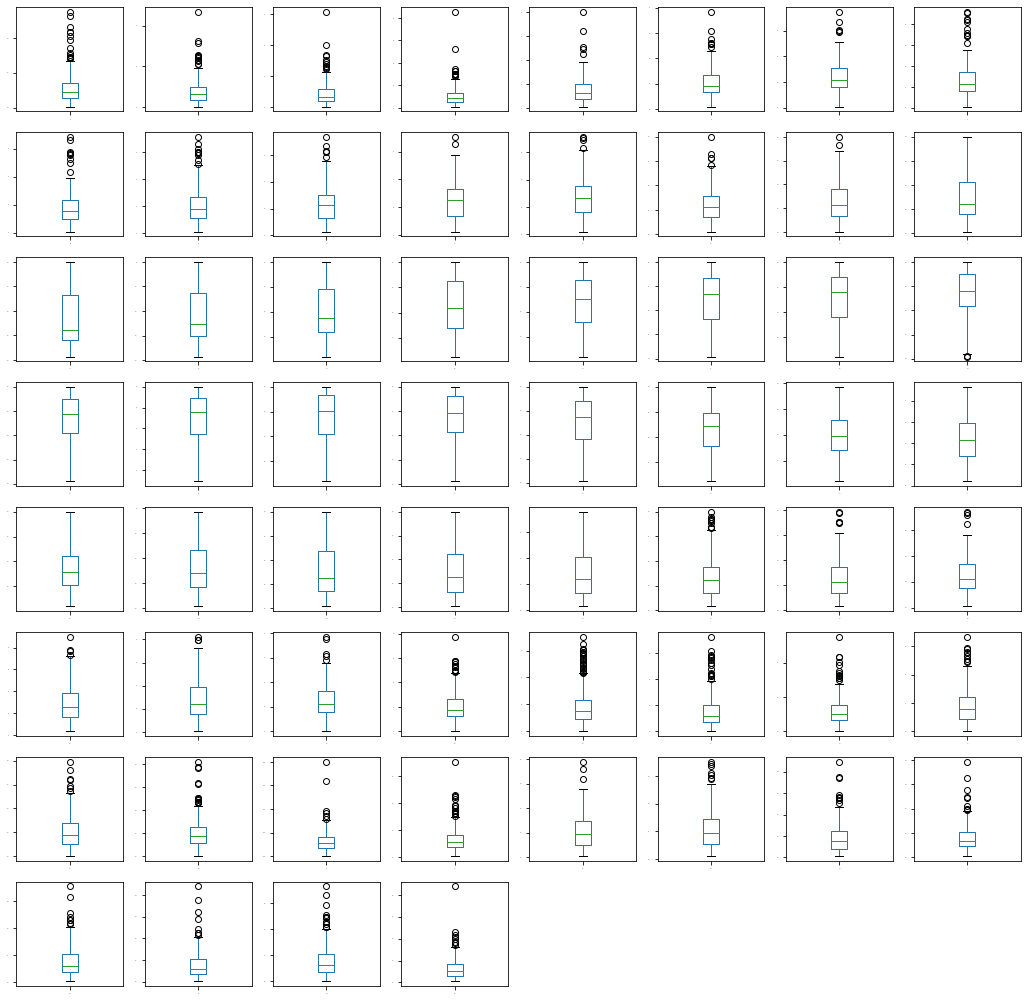

In [55]:
# box and whisker plots
sonar.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False, fontsize=1, figsize=(18,18))
plt.show()

##### Multivariate plots 

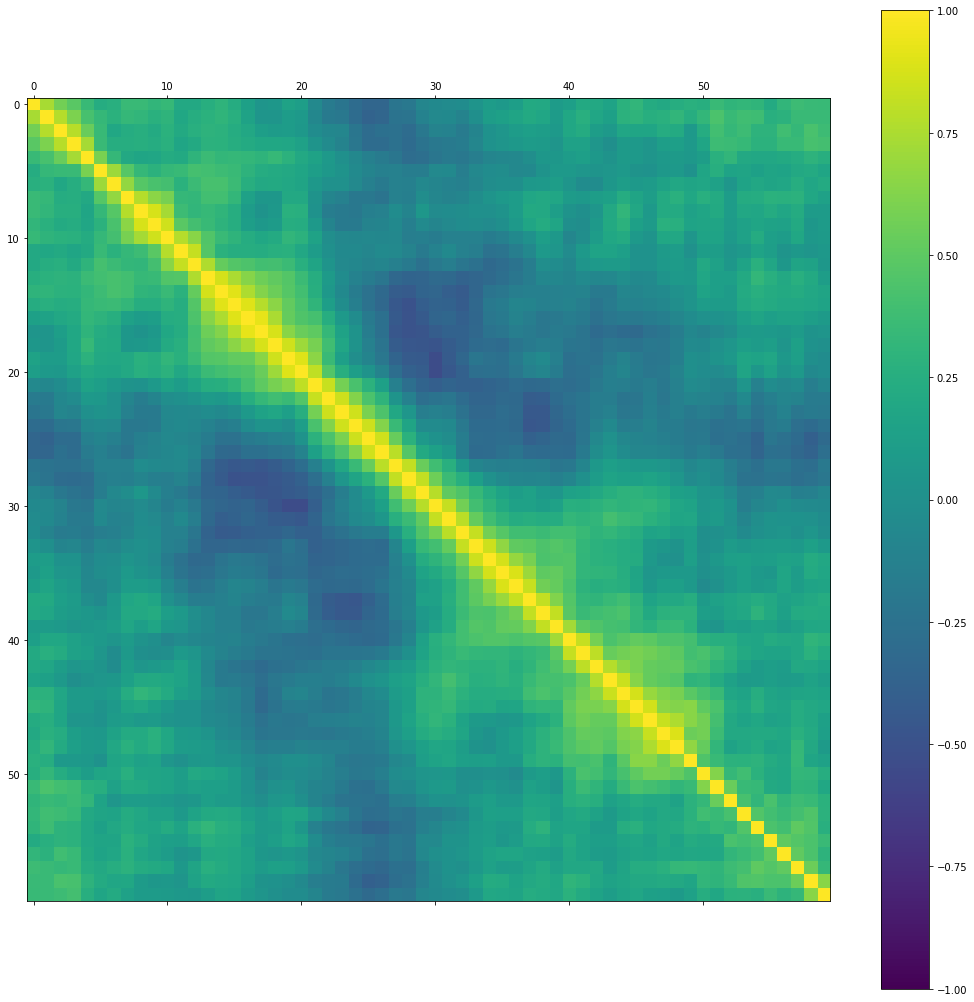

In [60]:
# correlation matrix
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111)
cax = ax.matshow(sonar.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

### Taking only values

In [61]:
sonar_array = sonar.values

### Features and Label data

In [62]:
X = sonar_array[:,0:60].astype(float)
y = sonar_array[:,60]

### Dividing into train and test

In [63]:
validation_size = 0.20
seed = 7
Xtrain, xvalidation, Ytrain, yvalidation = train_test_split(X,y, test_size=validation_size, random_state=seed)


### Evaluate Algorithms: Baseline

In [64]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

#### Linear and Non-linear Algorithm

1. Linear Algorithms: Logistic Regression (LR) and Linear Discriminant Analysis (LDA)
    
2. Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector
Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).

In [65]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [66]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

LR: 0.757721 (0.065198)
LDA: 0.701838 (0.086338)
KNN: 0.756618 (0.111644)
CART: 0.660294 (0.082965)
NB: 0.700368 (0.132161)
SVM: 0.547059 (0.106399)


/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/

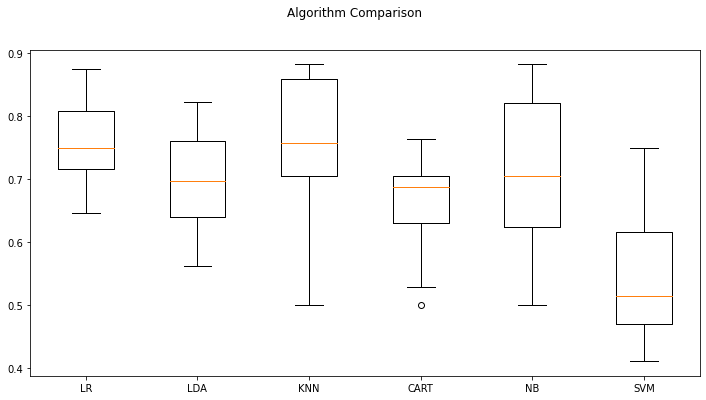

In [68]:
# Compare Algorithms
fig = plt.figure(figsize=(12,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Evaluate Algorithms: Standardize Data

In [69]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))


In [70]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

ScaledLR: 0.739338 (0.085535)
ScaledLDA: 0.701838 (0.086338)
ScaledKNN: 0.775368 (0.092709)
ScaledCART: 0.709926 (0.113358)
ScaledNB: 0.700368 (0.132161)
ScaledSVM: 0.824632 (0.067452)


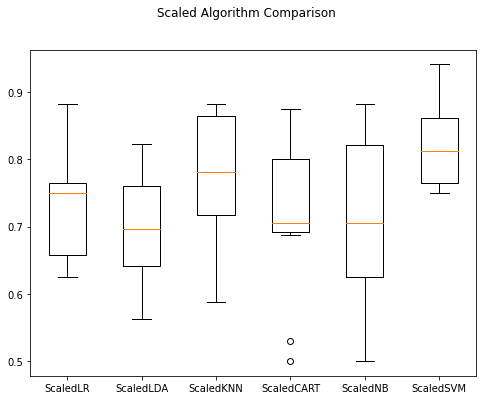

In [72]:
# Compare Algorithms
fig = plt.figure(figsize=(8,6))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### Algorithm Tuning

##### Tuning KNN

In [73]:
scaler = StandardScaler().fit(Xtrain)
rescaledX = scaler.transform(Xtrain)

In [74]:
# Tune scaled KNN
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)

model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)


In [75]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.830303 using {'n_neighbors': 1}


/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [76]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

0.830303 (0.066015) with: {'n_neighbors': 1}
0.818182 (0.065977) with: {'n_neighbors': 3}
0.781818 (0.089757) with: {'n_neighbors': 5}
0.751515 (0.055027) with: {'n_neighbors': 7}
0.721212 (0.073553) with: {'n_neighbors': 9}
0.696970 (0.048779) with: {'n_neighbors': 11}
0.684848 (0.075451) with: {'n_neighbors': 13}
0.684848 (0.068159) with: {'n_neighbors': 15}
0.678788 (0.078620) with: {'n_neighbors': 17}
0.672727 (0.068407) with: {'n_neighbors': 19}
0.678788 (0.060708) with: {'n_neighbors': 21}


##### Tuning SVM

In [78]:
scaler = StandardScaler().fit(Xtrain)
rescaledX = scaler.transform(Xtrain)

In [79]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()

In [81]:
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/

Best: 0.830303 using {'C': 1.5, 'kernel': 'rbf'}


/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/

In [83]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.757576 (0.045625) with: {'C': 0.1, 'kernel': 'linear'}
0.539394 (0.189070) with: {'C': 0.1, 'kernel': 'poly'}
0.533333 (0.097328) with: {'C': 0.1, 'kernel': 'rbf'}
0.660606 (0.100061) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.739394 (0.087924) with: {'C': 0.3, 'kernel': 'linear'}
0.636364 (0.155446) with: {'C': 0.3, 'kernel': 'poly'}
0.751515 (0.071727) with: {'C': 0.3, 'kernel': 'rbf'}
0.709091 (0.101886) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.703030 (0.103846) with: {'C': 0.5, 'kernel': 'linear'}
0.672727 (0.164063) with: {'C': 0.5, 'kernel': 'poly'}
0.787879 (0.062552) with: {'C': 0.5, 'kernel': 'rbf'}
0.715152 (0.108311) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.721212 (0.099442) with: {'C': 0.7, 'kernel': 'linear'}
0.709091 (0.140575) with: {'C': 0.7, 'kernel': 'poly'}
0.793939 (0.059960) with: {'C': 0.7, 'kernel': 'rbf'}
0.715152 (0.112845) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.709091 (0.095800) with: {'C': 0.9, 'kernel': 'linear'}
0.703030 (0.152372) with: {'C': 0.9, 'kernel': 

### Ensemble Methods

In this section we will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:
    
1. Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
2. Bagging Methods: Random Forests (RF) and Extra Trees (ET).

In [84]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))


In [85]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

AB: 0.758088 (0.079819)
GBM: 0.776838 (0.115690)
RF: 0.769485 (0.066747)


/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-package

ET: 0.775735 (0.109630)


/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/hasan/anaconda3/lib/python3.7/site-package

### distribution of accuracy

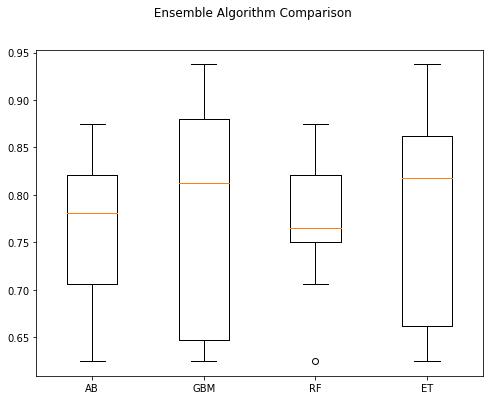

In [87]:
# Compare Algorithms
fig = plt.figure(figsize=(8,6))
fig.suptitle( ' Ensemble Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Same Project Using Deep Learning

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV 
from keras.utils.np_utils import to_categorical
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense


### Reading Dataset

In [113]:
sonar = pd.read_csv('/home/hasan/DATA SET/sonar/sonar.csv')

### Summarize the dataset

In [114]:
sonar.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.05,0.05,0.08,0.07,0.12,0.26,0.22,0.35,0.33,0.29,...,8.40e-03,8.90e-03,4.80e-03,9.40e-03,1.91e-02,1.40e-02,4.90e-03,5.20e-03,4.40e-03,R
1,0.03,0.06,0.11,0.11,0.10,0.23,0.24,0.38,0.56,0.62,...,2.32e-02,1.66e-02,9.50e-03,1.80e-02,2.44e-02,3.16e-02,1.64e-02,9.50e-03,7.80e-03,R
2,0.01,0.02,0.06,0.02,0.02,0.04,0.11,0.13,0.06,0.13,...,1.21e-02,3.60e-03,1.50e-02,8.50e-03,7.30e-03,5.00e-03,4.40e-03,4.00e-03,1.17e-02,R
3,0.08,0.07,0.05,0.04,0.06,0.06,0.12,0.25,0.36,0.45,...,3.10e-03,5.40e-03,1.05e-02,1.10e-02,1.50e-03,7.20e-03,4.80e-03,1.07e-02,9.40e-03,R
4,0.03,0.05,0.03,0.02,0.04,0.10,0.12,0.18,0.21,0.30,...,4.50e-03,1.40e-03,3.80e-03,1.30e-03,8.90e-03,5.70e-03,2.70e-03,5.10e-03,6.20e-03,R


In [115]:
#changing column name
a = np.arange(61)
a = list(a)
a = [str(c) for c in a]
print(a)
sonar.columns = (a) 

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60']


In [116]:
sonar.shape

(207, 61)

In [117]:
sonar.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [118]:
# correlation
pd.set_option('precision', 2)
print(sonar.corr(method='pearson'))


       0         1     2         3         4     5         6     7         8  \
0   1.00  7.36e-01  0.57  4.91e-01  3.46e-01  0.24  2.62e-01  0.36  3.57e-01   
1   0.74  1.00e+00  0.78  6.07e-01  4.20e-01  0.33  2.79e-01  0.33  3.18e-01   
2   0.57  7.80e-01  1.00  7.83e-01  5.46e-01  0.35  1.91e-01  0.24  2.54e-01   
3   0.49  6.07e-01  0.78  1.00e+00  7.29e-01  0.35  2.49e-01  0.25  2.52e-01   
4   0.35  4.20e-01  0.55  7.29e-01  1.00e+00  0.60  3.35e-01  0.20  1.77e-01   
5   0.24  3.32e-01  0.35  3.53e-01  5.97e-01  1.00  7.04e-01  0.47  3.29e-01   
6   0.26  2.79e-01  0.19  2.49e-01  3.35e-01  0.70  1.00e+00  0.68  4.69e-01   
7   0.36  3.35e-01  0.24  2.48e-01  2.04e-01  0.47  6.76e-01  1.00  7.80e-01   
8   0.36  3.18e-01  0.25  2.52e-01  1.77e-01  0.33  4.69e-01  0.78  1.00e+00   
9   0.32  2.71e-01  0.22  2.38e-01  1.83e-01  0.29  4.26e-01  0.65  8.80e-01   
10  0.34  2.97e-01  0.27  2.70e-01  2.33e-01  0.33  3.99e-01  0.59  7.34e-01   
11  0.21  1.94e-01  0.21  1.74e-01  2.13

In [119]:
# class distribution
print(sonar.groupby('60').size())

60
M    111
R     96
dtype: int64


### Data Visualizations


##### Univariate plots

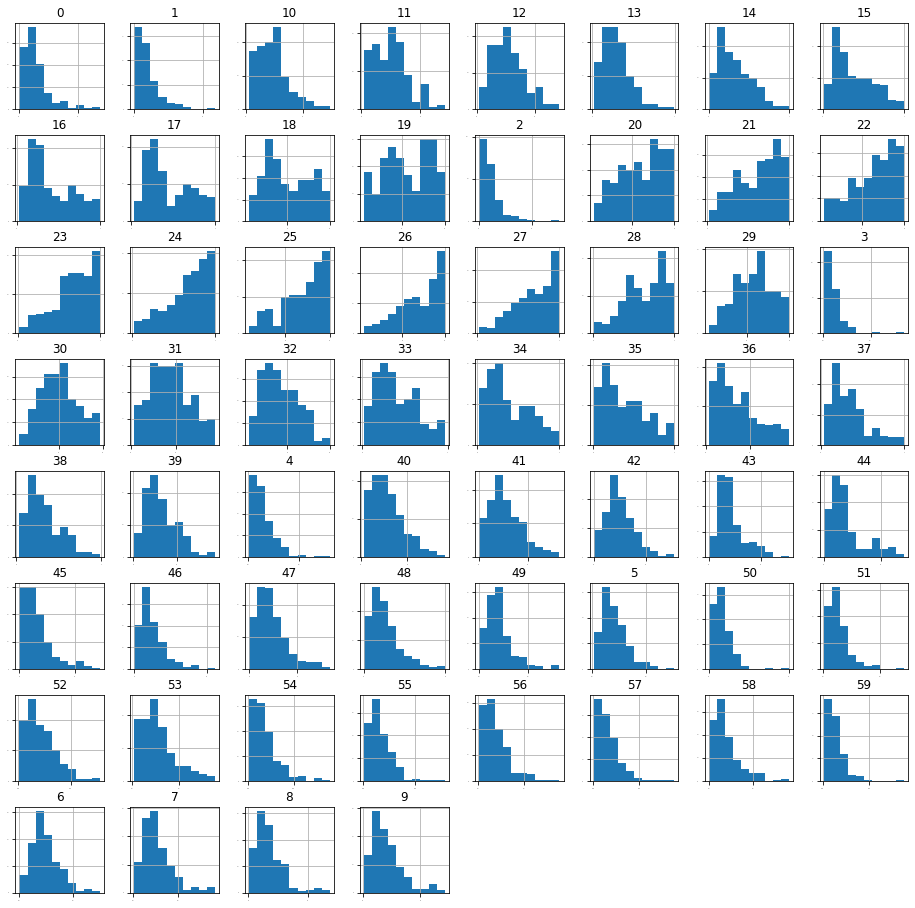

In [120]:
# histograms
sonar.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(16,16))
plt.show()

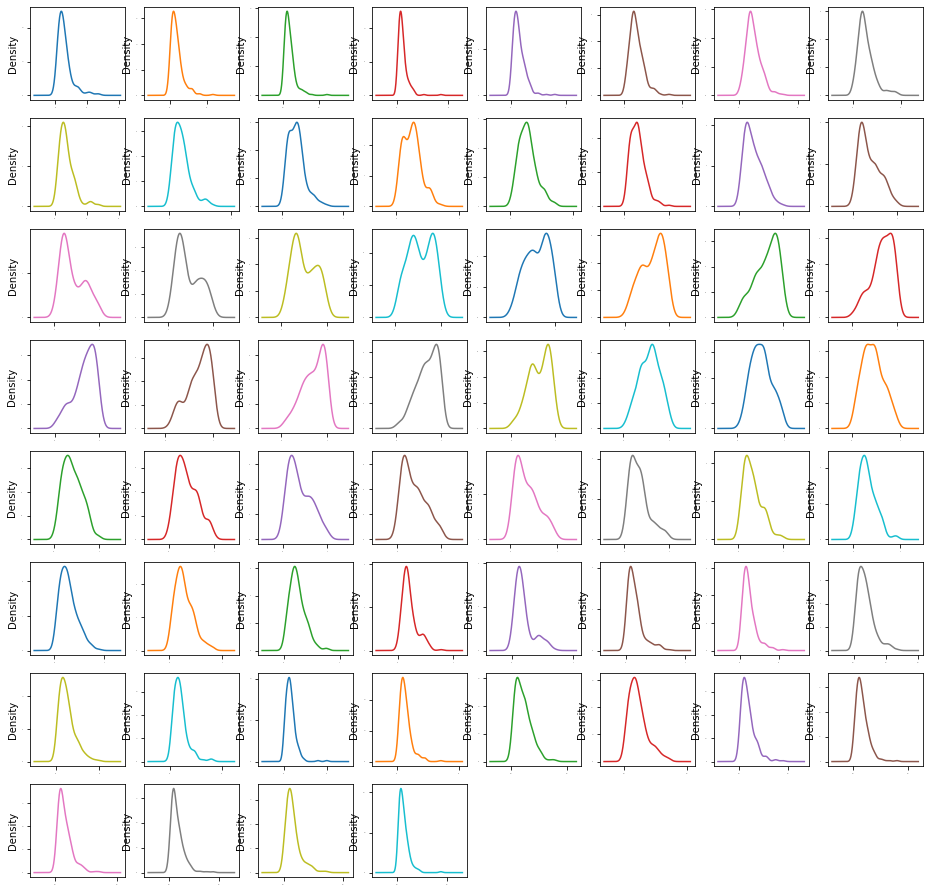

In [121]:
# density
sonar.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(16,16))
plt.show()

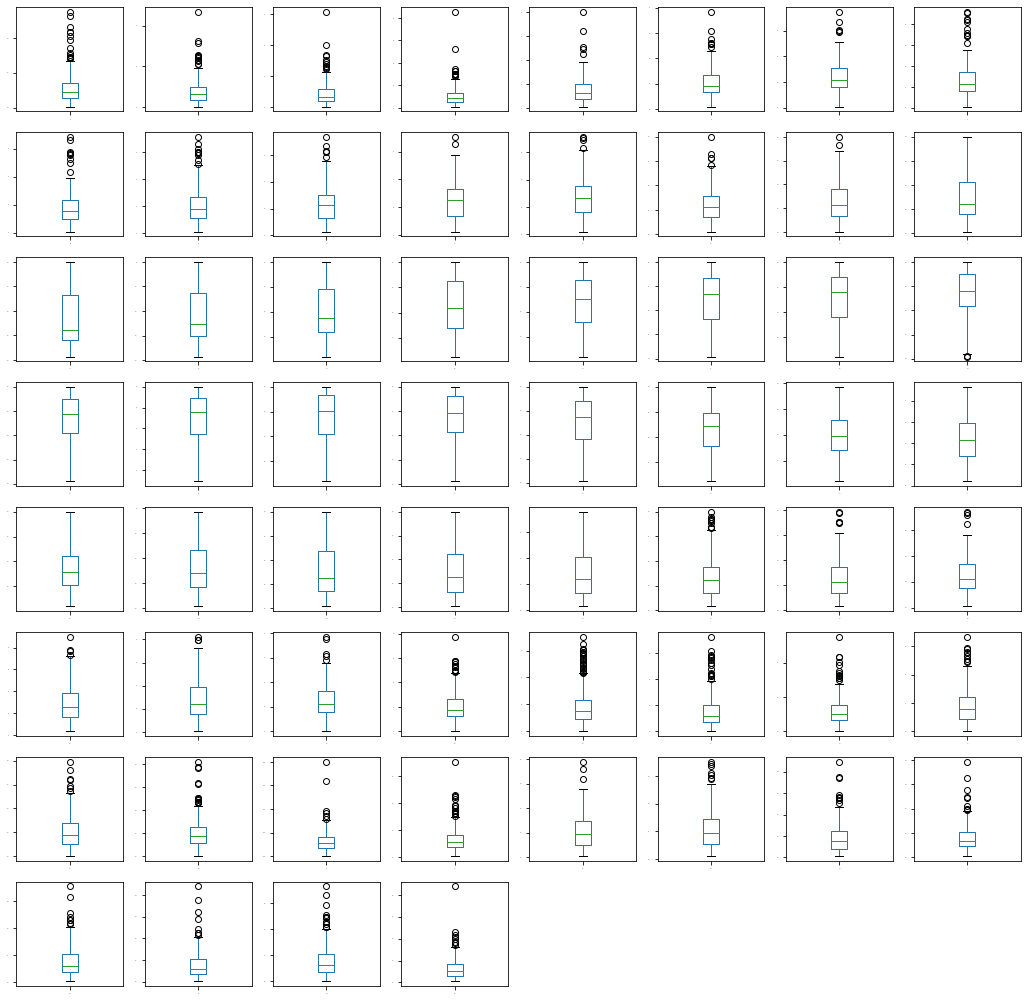

In [122]:
# box and whisker plots
sonar.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False, fontsize=1, figsize=(18,18))
plt.show()

##### Multivariate plots

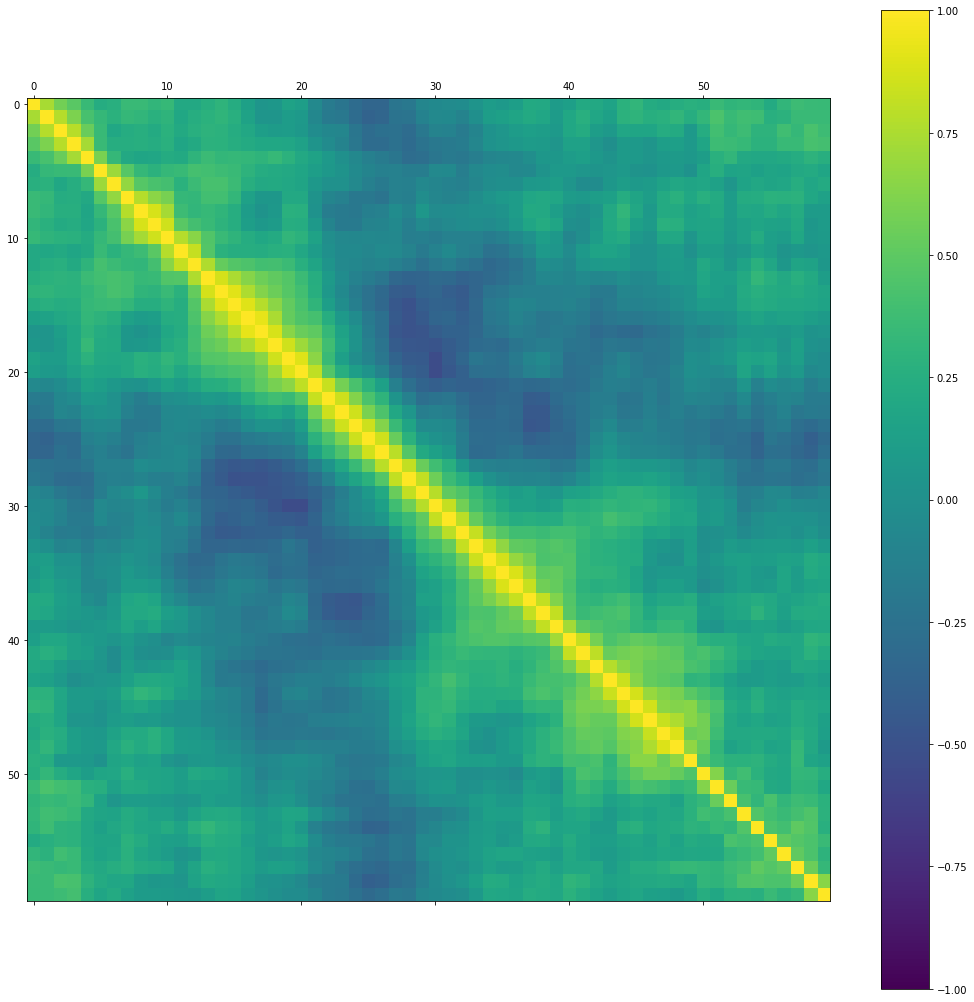

In [123]:
# correlation matrix
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111)
cax = ax.matshow(sonar.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

### Taking only values

In [124]:
sonar_array = sonar.values

### Features and Label data

In [125]:
X = sonar_array[:,0:60].astype(float)
y = sonar_array[:,60]

### Encoding

In [126]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

dummy_y = to_categorical(encoded_y)
dummy_y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

### Neural Network

In [131]:
def baseline_model():
    model = Sequential()
    model.add(Dense(50, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, kernel_initializer= 'normal', activation='sigmoid'))
    
    # Compile model
    model.compile(loss='mean_squared_error', 
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

### Data Standardize

In [132]:
estimators = []
estimators.append(('standardize', StandardScaler()))

### Keras Classifier

In [133]:
estimators.append(('mlp', KerasClassifier(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)

### K-Fold

In [134]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, dummy_y, cv=kfold)
print("Accuracy: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Accuracy: 0.87 (0.08) MSE
